In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Boston.csv')
df.head(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


In [3]:
df.shape

(506, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [5]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

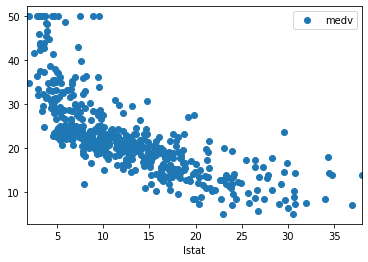

In [7]:
df.plot(x='lstat',y='medv',style='o') # it shows -ve relationship
plt.show()

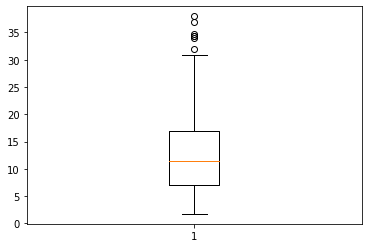

In [8]:
plt.boxplot(df['lstat']) # replce otliers with median for better accuracy
plt.show()

In [9]:
# convert into X and Y
x=pd.DataFrame(df.iloc[:,:-1])
y=pd.DataFrame(df.iloc[:,-1])

In [10]:
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [11]:
from sklearn.model_selection import train_test_split # library

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [13]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape) # only 1 column cause independent var 
print(y_test.shape)

(354, 13)
(152, 13)
(354, 1)
(152, 1)


In [14]:
# create model
from sklearn.linear_model import LinearRegression

In [15]:
# call the function
m1=LinearRegression()

In [16]:
# pass the data i.e fit the model
m1.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
m1.coef_  #y=m1x1+m2x2.....m13x13 + c intercept values

array([[-9.85424717e-02,  6.07841138e-02,  5.91715401e-02,
         2.43955988e+00, -2.14699650e+01,  2.79581385e+00,
         3.57459778e-03, -1.51627218e+00,  3.07541745e-01,
        -1.12800166e-02, -1.00546640e+00,  6.45018446e-03,
        -5.68834539e-01]])

In [18]:
# do prediction of data
y_pred = m1.predict(x_test)

In [19]:
from sklearn import metrics

In [20]:
# finding the error values
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

MAE 3.344665503598753


In [21]:
print('MSE',metrics.mean_squared_error(y_test,y_pred))

MSE 19.83132367206309


In [22]:
import numpy as np
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

RMSE 4.453237437198143


In [23]:
# Accuracy score
metrics.r2_score(y_test,y_pred)

0.7836295385076297

# Naive Bayes

In [24]:
from sklearn import datasets

In [25]:
wine=datasets.load_wine()

In [26]:
#wine

In [27]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [28]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [29]:
wine.data.shape

(178, 13)

In [30]:
# Here wine.data=x & wine.target=y so conversion not required
x=wine.data
y=wine.target

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)

In [33]:
from sklearn.naive_bayes import GaussianNB

In [34]:
gnb=GaussianNB()

In [35]:
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [36]:
y_pred=gnb.predict(x_test)

In [37]:
y_pred

array([2, 1, 2, 1, 1, 2, 0, 2, 2, 1, 2, 2, 2, 0, 0, 2, 1, 1, 0, 1, 2, 2,
       2, 2, 1, 2, 2, 1, 0, 0, 0, 0, 2, 1, 2, 1, 2, 0, 1, 1, 2, 2, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 2, 2, 1])

In [38]:
from sklearn import metrics

In [39]:
metrics.accuracy_score(y_test,y_pred) # rarely its getting 100% accuracy 

1.0

# Random Forest

In [40]:
from sklearn import datasets

In [41]:
rf = datasets.load_iris()

In [42]:
rf.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [43]:
import pandas as pd

In [44]:
data=pd.DataFrame({'sepal length':rf.data[:,0],
                  'sepal width':rf.data[:,1],
                  'petal length':rf.data[:,2],
                  'petal width':rf.data[:,3],
                  'species':rf.target})

In [45]:
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [46]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12)

In [49]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
clf=RandomForestClassifier(n_estimators=100)

In [52]:
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [53]:
y_pred=clf.predict(x_test)

In [54]:
from sklearn import metrics

In [55]:
metrics.accuracy_score(y_test,y_pred)

0.9777777777777777

In [56]:
clf.feature_importances_
#sl=10% , sw=4% , pl=44% , pw=43%

array([0.07281217, 0.02315026, 0.4981116 , 0.40592596])

In [57]:
# as sepal width has low accuracy remove it and done all process for 
#getting better accuracy

# K-Means

In [58]:
from sklearn.datasets import load_iris

In [59]:
iris= load_iris()

In [60]:
from sklearn.cluster import KMeans
k2=KMeans(n_clusters=3)

In [61]:
k2.fit(iris.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [62]:
k2.cluster_centers_ # centroid values

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [63]:
k_pred=k2.predict(iris.data)

In [64]:
k_pred # 0,1,2 Three clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [65]:
import pandas as pd
pd.crosstab(iris.target,k_pred)

col_0,0,1,2
row_0,,,
0,0,50,0
1,48,0,2
2,14,0,36


In [1]:
#conda install mlxtend --channel conda-forge